# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [14]:
#config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [15]:
#query URL and variables
city = "yellowknife"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

#weather data
weather_response = requests.get(query_url)
print(weather_response.status_code)
weather_json = weather_response.json()

200


In [16]:
lat = weather_json["coord"]["lat"]
lng = weather_json["coord"]["lon"]
country = weather_json["sys"]["country"]
cloudiness = weather_json["clouds"]["all"]
date = weather_json["dt"]
city_name = weather_json["name"]
wind = weather_json["wind"]["speed"]

temp = weather_json["main"]["temp"]
pressure = weather_json["main"]["pressure"]
humidity = weather_json["main"]["humidity"]

In [17]:
cities[-10:]

['beboto',
 'faxinal',
 'maceio',
 'belaya gora',
 'rawannawi',
 'poronaysk',
 'fortuna',
 'harper',
 'beausejour',
 'boyuibe']

In [18]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [20]:
lats = []
lngs = []
countries = []
clouds = []
dates = []
names = []
winds = []
temps = []
pressures = []
humids = []

for city in cities:
    
    print(city)
    
    #request data
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    #get weather data
    weather_response = requests.get(query_url)
    print(weather_response.status_code)
    print()
    
    
    try:
        weather_json = weather_response.json()
        #parse the data
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        country = weather_json["sys"]["country"]
        cloudiness = weather_json["clouds"]["all"]
        date = weather_json["dt"]
        city_name = weather_json["name"]
        wind = weather_json["wind"]["speed"]

        temp = weather_json["main"]["temp"]
        pressure = weather_json["main"]["pressure"]
        humidity = weather_json["main"]["humidity"]

        #place data into list
        lats.append(lat)
        lngs.append(lng)
        countries.append(country)
        clouds.append(cloudiness)
        dates.append(date)
        names.append(city_name)
        winds.append(wind)
        temps.append(temp)
        pressures.append(pressure)
        humids.append(humidity)
    
    except Exception as e:
        print(e)
        
        #place data in list
        lats.append(np.nan)
        lngs.append(np.nan)
        countries.append(None)
        clouds.append(np.nan)
        dates.append(np.nan)
        names.append(city_name)
        winds.append(np.nan)
        temps.append(np.nan)
        pressures.append(np.nan)
        humids.append(np.nan)
        
    time.sleep(1)

kapaa
200

rikitea
200

cape town
200

hilo
200

nushki
200

butaritari
200

busselton
200

barrow
200

tuy hoa
200

ushuaia
200

grand river south east
404

'coord'
amderma
404

'coord'
iskateley
200

pevek
200

florida
200

aksu
200

bluff
200

jalandhar
200

beian
200

hermanus
200

ijaki
404

'coord'
cabra
200

mpanda
200

garissa
200

praia
200

norman wells
200

bantva
200

upernavik
200

mount isa
200

bairnsdale
200

tuatapere
200

dalbandin
200

port elizabeth
200

punta arenas
200

tasiilaq
200

kushiro
200

filingue
200

vila franca do campo
200

kodiak
200

tidore
404

'coord'
lorengau
200

chicama
200

saint anthony
200

zhigansk
200

tlanisco
404

'coord'
tucumcari
200

tezu
200

bethel
200

keetmanshoop
200

los llanos de aridane
200

maarianhamina
200

vilyuysk
200

auki
200

sataua
404

'coord'
atuona
200

abha
200

hadejia
200

avarua
200

flinders
200

les cayes
200

puerto ayora
200

castro
200

pajan
200

abapo
200

valparaiso
200

dikson
200

sitka
200

tonj
200



200

sao lourenco da serra
200

oberstdorf
200

humboldt
200

hovd
200

marrakesh
200

shakhtinsk
200

constitucion
200

fernley
200

agua dulce
200

prince rupert
200

pilar
200

sanming
200

asosa
200

hammerfest
200

santiago del estero
200

tarudant
404

'coord'
dali
200

bandarbeyla
200

jalu
200

yeppoon
200

karkaralinsk
404

'coord'
longlac
404

'coord'
snasa
200

oulainen
200

doctor pedro p. pena
404

'coord'
moissala
200

nouakchott
200

tokzar
404

'coord'
minsk
200

dunedin
200

elizabeth city
200

dargaville
200

zhuhai
200

mitsamiouli
200

pringsewu
200

korsakov
200

sterlibashevo
200

sabha
200

aksarka
200

bairiki
200

grootfontein
200

karwar
200

san-pedro
200

rafaela
200

lamar
200

san policarpo
200

aklavik
200

saint-remi
200

krasnousolskiy
404

'coord'
divnogorsk
200

araouane
200

beboto
200

faxinal
200

maceio
200

belaya gora
200

rawannawi
404

'coord'
poronaysk
200

fortuna
200

harper
200

beausejour
200

boyuibe
200



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
df = pd.DataFrame()

df["city"] = names
df["Country"] = countries
df["Latitude"] = lats
df["Longitude"] = lngs
df["Temperature"] = temps
df["Date"] = date
df["wind_Speed"] = winds
df["Pressure"] = pressures
df["Humidity"] = humids
df["Cloudiness"] = clouds
df.head()


,city,Country,Latitude,Longitude,Temperature,Date,wind_Speed,Pressure,Humidity,Cloudiness
0,Kapaa,US,22.0752,-159.3190,76.89,1644441062,5.99,1018.0,68.0,25.0
1,Rikitea,PF,-23.1203,-134.9692,79.00,1644441062,15.26,1020.0,68.0,0.0
2,Cape Town,ZA,-33.9258,18.4232,68.54,1644441062,1.14,1014.0,79.0,0.0
3,Hilo,US,19.7297,-155.0900,74.79,1644441062,3.44,1019.0,72.0,100.0
4,Nushki,PK,29.5542,66.0215,48.31,1644441062,2.19,1021.0,29.0,0.0


In [22]:
df.to_csv("weather_data.csv", index=False)

In [23]:
df.head()

,city,Country,Latitude,Longitude,Temperature,Date,wind_Speed,Pressure,Humidity,Cloudiness
0,Kapaa,US,22.0752,-159.3190,76.89,1644441062,5.99,1018.0,68.0,25.0
1,Rikitea,PF,-23.1203,-134.9692,79.00,1644441062,15.26,1020.0,68.0,0.0
2,Cape Town,ZA,-33.9258,18.4232,68.54,1644441062,1.14,1014.0,79.0,0.0
3,Hilo,US,19.7297,-155.0900,74.79,1644441062,3.44,1019.0,72.0,100.0
4,Nushki,PK,29.5542,66.0215,48.31,1644441062,2.19,1021.0,29.0,0.0


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
df = pd.read_csv("weather_data.csv")

In [25]:
#  Get the indices of cities that have humidity over 100%.


In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
mask = df.Humidity <= 100
df2 = df.loc[mask].dropna().reset_index(drop=True)
df2.head()


,city,Country,Latitude,Longitude,Temperature,Date,wind_Speed,Pressure,Humidity,Cloudiness
0,Kapaa,US,22.0752,-159.3190,76.89,1644441062,5.99,1018.0,68.0,25.0
1,Rikitea,PF,-23.1203,-134.9692,79.00,1644441062,15.26,1020.0,68.0,0.0
2,Cape Town,ZA,-33.9258,18.4232,68.54,1644441062,1.14,1014.0,79.0,0.0
3,Hilo,US,19.7297,-155.0900,74.79,1644441062,3.44,1019.0,72.0,100.0
4,Nushki,PK,29.5542,66.0215,48.31,1644441062,2.19,1021.0,29.0,0.0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

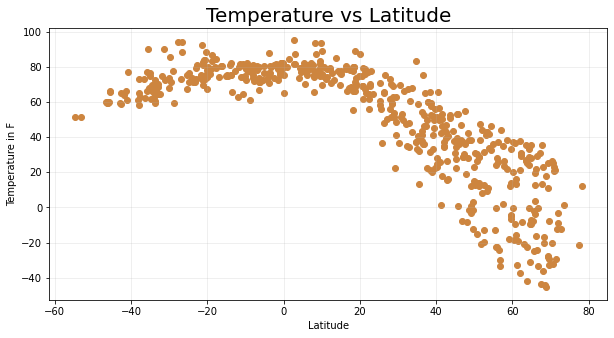

In [27]:
plt.figure(figsize=(10,5))

plt.scatter(df2.Latitude, df2.Temperature, color="peru")

plt.title("Temperature vs Latitude", fontsize=20)
plt.xlabel("Latitude")
plt.ylabel("Temperature in F")

plt.grid(axis="both", alpha=0.25)
plt.savefig("temp_lat.png")
plt.show()

## Latitude vs. Humidity Plot

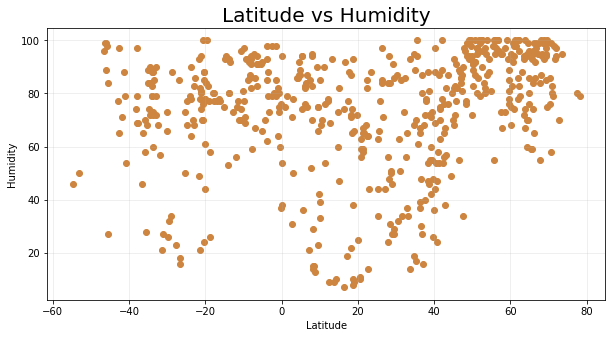

In [28]:
plt.figure(figsize=(10,5))

plt.scatter(df2.Latitude, df2.Humidity, color="peru")

plt.title("Latitude vs Humidity", fontsize=20)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid(axis="both", alpha=0.25)
plt.savefig("lat_humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

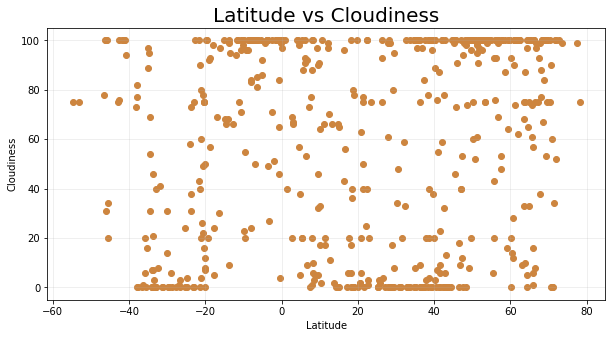

In [29]:
plt.figure(figsize=(10,5))

plt.scatter(df2.Latitude, df2.Cloudiness, color="peru")

plt.title("Latitude vs Cloudiness", fontsize=20)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.grid(axis="both", alpha=0.25)
plt.savefig("lat_clouds.png")
plt.show()

## Latitude vs. Wind Speed Plot

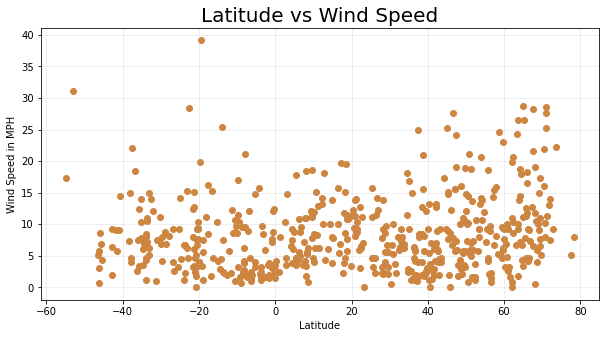

In [30]:
plt.figure(figsize=(10,5))

plt.scatter(df2.Latitude, df2.wind_Speed, color="peru")

plt.title("Latitude vs Wind Speed", fontsize=20)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed in MPH")

plt.grid(axis="both", alpha=0.25)
plt.savefig("lat_speed.png")
plt.show()

## Linear Regression

In [31]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [32]:
#separating hemispheres
dfn = df2.loc[df2.Latitude >= 0]
dfs = df2.loc[df2.Latitude < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7245220775126096


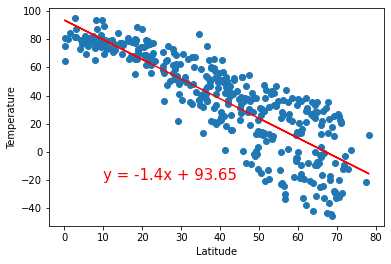

In [33]:
# Print out the r-squared value along with the plot.
x_values = dfn['Latitude']
y_values = dfn['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,-20),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.31430607820720063


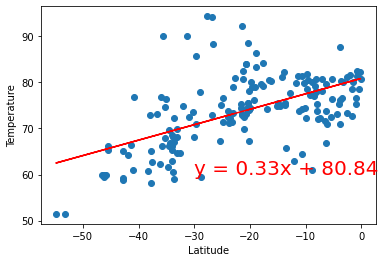

In [36]:
# Print out the r-squared value along with the plot.
x_values = dfs['Latitude']
y_values = dfs['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-30,60),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20276632689037655


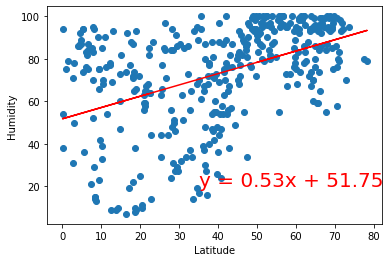

In [39]:
# Print out the r-squared value along with the plot.
x_values = dfn['Latitude']
y_values = dfn['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(35,20),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.040127022474872105


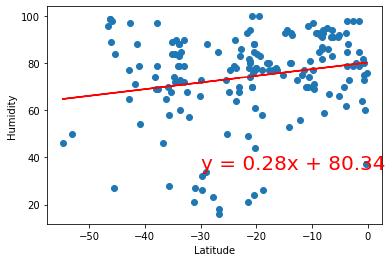

In [41]:
# Print out the r-squared value along with the plot.
x_values = dfs['Latitude']
y_values = dfs['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-30,35),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06918165146736553


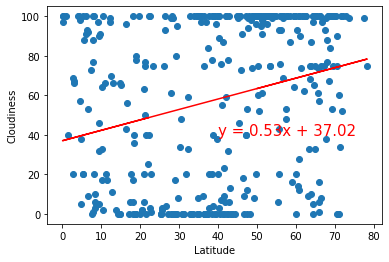

In [44]:
# Print out the r-squared value along with the plot.
x_values = dfn['Latitude']
y_values = dfn['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14163220417522673


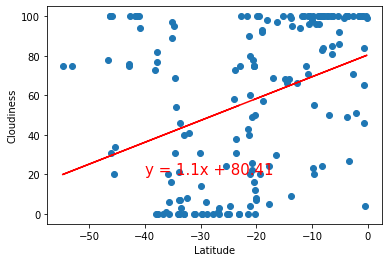

In [46]:
# Print out the r-squared value along with the plot.
x_values = dfs['Latitude']
y_values = dfs['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.039099156976655516


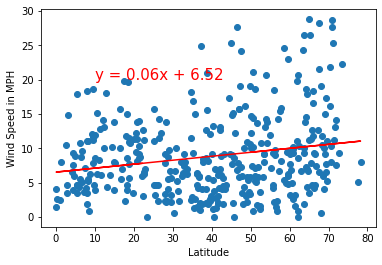

In [49]:
# Print out the r-squared value along with the plot.
x_values = dfn['Latitude']
y_values = dfn['wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed in MPH')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.031953689711873734


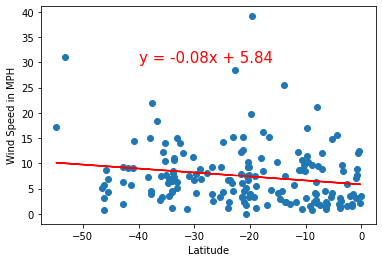

In [51]:
# Print out the r-squared value along with the plot.
x_values = dfs['Latitude']
y_values = dfs['wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed in MPH')

print(f"The r-squared is: {rvalue**2}")
plt.show()